In [86]:
import re
import jieba
import jieba.analyse
import jieba.posseg
import pandas as pd

poems_tang=pd.read_csv('data_tang/poems_tang.csv') 
authors_tang=pd.read_csv('data_tang/authors_tang.csv') 

In [9]:
poems_tang.head()

,author,paragraphs,title,id,tags
0,太宗皇帝,"['秦川雄帝宅，函谷壯皇居。', '綺殿千尋起，離宮百雉餘。', '連甍遙接漢，飛觀迥凌虛。...",帝京篇十首 一,3ad6d468-7ff1-4a7b-8b24-a27d70d00ed4,NaN
1,太宗皇帝,"['巖廊罷機務，崇文聊駐輦。', '玉匣啓龍圖，金繩披鳳篆。', '韋編斷仍續，縹帙舒還卷。...",帝京篇十首 二,13e72581-968b-457f-b381-a3b7d95b8b7c,NaN
2,太宗皇帝,"['移步出詞林，停輿欣武宴。', '琱弓寫明月，駿馬疑流電。', '驚雁落虛弦，啼猿悲急箭。...",帝京篇十首 三,a7ff247d-a11c-4ca9-a22f-ca420b8c537c,NaN
3,太宗皇帝,"['鳴笳臨樂館，眺聽歡芳節。', '急管韻朱絃，清歌凝白雪。', '彩鳳肅來儀，玄鶴紛成列。...",帝京篇十首 四,fa374b2b-c196-4362-b4ad-8931fc9a8860,NaN
4,太宗皇帝,"['芳辰追逸趣，禁苑信多奇。', '橋形通漢上，峰勢接雲危。', '煙霞交隱映，花鳥自參差。...",帝京篇十首 五,86952cb3-b622-4398-a56a-01dd39f6c6ec,NaN


In [10]:
authors_tang.head()

,desc,name,id
0,帝姓李氏，諱世民，神堯次子，聰明英武。貞觀之治，庶幾成康，功德兼隆。由漢以來，未之有也。而銳...,太宗皇帝,f78aa699-e012-4059-9e29-5d30e16cc1d8
1,帝諱治，文皇第九子，始封晉王。貞觀十七年，立爲皇太子。在位三十四年，諡曰天皇大帝。集八十六卷...,高宗皇帝,1701410c-07da-42a3-b2fb-7b1e407d7d52
2,帝諱顯，高宗第七子，始封周王。儀鳳二年，徙封英王，改名哲。永隆元年，立爲皇太子，及即位，太后...,中宗皇帝,ba551bb1-878d-41f6-8577-a41e16fff688
3,帝諱旦，高宗第八子，中宗母弟，封相王。景龍四年，即皇帝位。帝謙恭孝友，好學，工草隸，尤愛文字...,睿宗皇帝,512b79d1-73c4-4fff-91bd-fc9af6b02974
4,帝諱隆基，睿宗第三子，始封楚王，後爲臨淄郡王。景雲元年，進封平王，立爲皇太子，英武多能。開元...,明皇帝,20a8a766-a18a-4193-85fb-04eb4aeb9e60


In [97]:
def dosegment_all(sentence,stopwords):
    '''
    带词性标注，对句子进行分词，排除停词
    :param sentence:输入字符
    :return:
    '''
    sentence_seged = jieba.posseg.cut(sentence.strip())
    outstr = ''
    for x in sentence_seged:
        if x.word not in stopwords:
            outstr+="{}/{},".format(x.word,x.flag)
    #上面的for循环可以用python递推式构造生成器完成
    # outstr = ",".join([("%s/%s" %(x.word,x.flag)) for x in sentence_seged])
    return outstr
# 有关词性的说明
# https://blog.csdn.net/enter89/article/details/80619805

# string = '床前明月光，疑是地上霜]'
# dosegment_all(string,stopwords)
# '床/n,前/f,明月光/nr,疑/vg,是/v,地上/s,霜/n,'

In [99]:
def dosegment_all_no_annotate(sentence,stopwords):
    '''
    不带词性标注，对句子进行分词，排除停词
    :param sentence:输入字符
    :return:
    '''
    words = list(jieba.cut(sentence.strip()))
    outstr=[x for x in words if x not in stopwords]
    return outstr
# string = '床前明月光，疑是地上霜]'
# dosegment_all(string,stopwords)
# ['床前', '明月光', '疑是', '地上', '霜']

In [133]:
# 将唐诗所有诗词paragraphs存储到一个list中，并进行分词和停用词过滤
tang_content=poems_tang['paragraphs'].apply(lambda x: dosegment_all_no_annotate(x,stopwords))

In [134]:
tang_content[:2]

0    [秦川, 雄帝, 宅, 函谷壯, 皇居, ,,  , 綺, 殿, 千尋起, 離宮, 百雉, ...
1    [巖, 廊, 罷機務, 崇文, 聊, 駐, 輦, ,,  , 玉匣, 啓, 龍圖, 金繩, ...
Name: paragraphs, dtype: object

In [135]:
tang_content_total=tang_content.sum()
# 运行此段代码需要10分钟

In [136]:
print(tang_content_total[:5])
print(len(tang_content_total))

['秦川', '雄帝', '宅', '函谷壯', '皇居']
2215353


In [137]:
words_frequency_dict = dict()

# 统计词频
for word in tang_content_total:
    words_frequency_dict[word] = words_frequency_dict.get(word, 0) + 1
words_frequency = words_frequency_dict.items()
# print(words_frequency)

In [140]:
# 找到词频排前2000的词语
top_n = len(words_frequency) if len(words_frequency) < 2000 else 2000
top_words_frequency = sorted(words_frequency,key=lambda x: x[1],reverse=True)[:top_n]
for word,fre in top_words_frequency[:30]:
    print(str(word)+':'+str(fre))
print(type(top_words_frequency))

,:210098
 :210098
爲:12260
《:9451
》:9449
）:8803
在:7055
不:6429
「:6119
」:6112
有:6086
月:5855
與:5492
無:5116
長:5100
去:5094
閑:4973
誰:4688
是:4637
人:4532
見:4424
復:4218
我:4148
上:4118
來:3917
雲:3618
中:3431
裏:3362
黃:3317
歸:3271
<class 'list'>


In [154]:
# 转化成dic，因为wordclound支持dict数据格式
top_words_frequency_dict=dict(top_words_frequency)

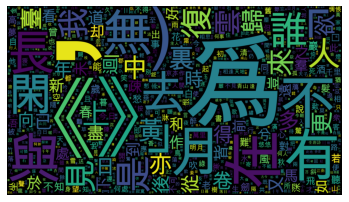

In [165]:
# 生成词云
from wordcloud import WordCloud
import os
import matplotlib.pyplot as plt
def show_img(wc):
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
# 实例化，通过font_path传入一个支持中文的字体
wc = WordCloud(font_path=os.environ.get("FONT_PATH", "/Library/Fonts/Arial Unicode.ttf"),
               max_words=1000,
               width=1920,
               height=1080,
               background_color="black",
               margin=5)

# 1、传入[（key，weight）,...]列表生成词云
wc.generate_from_frequencies(top_words_frequency_dict)
# 2、传入"key key key key" 字符串生成词云
# wc.generate(content)

# 保存图片到本地
wc.to_file('tang_poem_word_count.png')
show_img(wc)